<img src="https://media.giphy.com/media/hvRJCLFzcasrR4ia7z/giphy.gif" width="25px">

## <font color='blue'>===================Give It A Try !!========================</font>

In [1]:
import numpy as np
import torch 
import time
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [2]:
g = nx.read_edgelist('karate_nx.edgelist',nodetype=int)

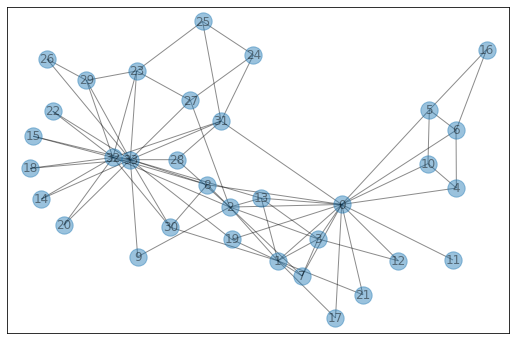

In [3]:
fig = plt.figure(figsize=(9,6))
nx.draw_networkx(g, alpha = 0.45);

==============================================================================================================

In [4]:
A = nx.to_numpy_array(g,nodelist=range(34))

In [5]:
A.sum()

156.0

## $I + D^{-1}A$

In [6]:
I = np.eye(A.shape[0])

In [7]:
A = A + I

In [8]:
D = A.sum(axis=1)
D_inv = np.diag(D**(-1))

In [9]:
DA = I+D_inv.dot(A)

In [10]:
u,v = np.linalg.eig(DA)

In [11]:
u.shape, v.shape

((34,), (34, 34))

In [12]:
u

array([2.        , 1.89614205, 0.57988973, 1.77409052, 1.70108827,
       0.68838368, 0.72929399, 0.80709306, 0.78890257, 0.88342155,
       0.916668  , 0.95721563, 0.99250725, 1.03463373, 1.10123867,
       1.5480851 , 1.53643405, 1.49043559, 1.46344109, 1.45333399,
       1.38569625, 1.18756596, 1.36030482, 1.3049289 , 1.2930361 ,
       1.25695949, 1.2371355 , 0.7763932 , 1.33333333, 1.2236068 ,
       1.33333333, 1.33333333, 1.33333333, 1.33333333])

In [13]:
a = np.linalg.svd(DA,full_matrices=1,compute_uv=0)

In [14]:
a

array([2.22784475, 2.06378701, 1.81695718, 1.7443268 , 1.60349108,
       1.5645426 , 1.53545438, 1.49443853, 1.46263156, 1.39509266,
       1.3675681 , 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.31182982, 1.29686412, 1.25576387, 1.23902531,
       1.22531245, 1.18744168, 1.09662164, 1.03709123, 0.97601831,
       0.94568284, 0.90361861, 0.87491796, 0.78471296, 0.77732836,
       0.77531245, 0.66725144, 0.65103901, 0.50896647])

### L2_Norm( A*W_u)

In [15]:
def Rand_aw(A, n=1):
    #np.random.seed(1024)
    w = np.random.random(A.shape)
    A = A*w + n*np.eye(A.shape[0])
    row_sum = np.sum(A**2, axis=1,keepdims=True)
    A = A/(np.sqrt(row_sum)+1e-12)
    return A

## Randomly Generate 1000 Uniform Distribution Matrices!

In [16]:
A_us = []
for _ in range(1000):
    A_us.append(Rand_aw(A))

## SVD

In [17]:
s_u = []
for i in A_us:
    j = np.linalg.svd(i,full_matrices=1,compute_uv=0)
    s_u.append(j)

## Visualization

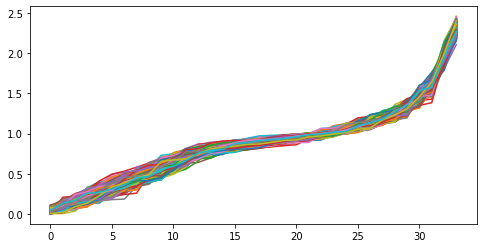

In [18]:
fig_u = plt.figure(figsize=(8,4))
for i in s_u:
    plt.plot(range(A.shape[0]), np.sort(i));

In [19]:
def Rand_awn(A, n=1):
    #np.random.seed(1024)
    w = np.random.randn(*A.shape) 
    A = A*w + n*np.eye(A.shape[0])
    row_sum = np.sum(A**2, axis=1,keepdims=True)
    A = A/(np.sqrt(row_sum)+1e-12)
    return A

## Randomly Generate 1000 Normal Distribution Matrices!

In [20]:
A_ns = []
for _ in range(1000):
    A_ns.append(Rand_awn(A))

In [21]:
s_n = []
for i in A_ns:
    j = np.linalg.svd(i,full_matrices=1,compute_uv=0)
    s_n.append(j)

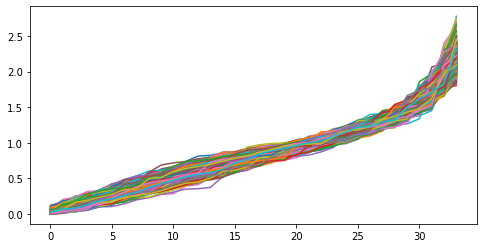

In [22]:
fig_n = plt.figure(figsize=(8,4))
for i in s_n:
    plt.plot(range(A.shape[0]), np.sort(i));

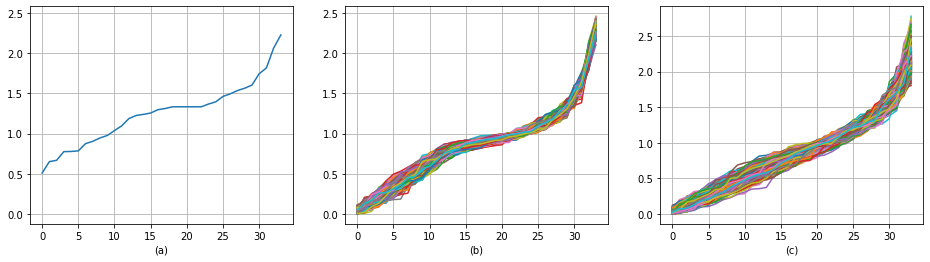

In [23]:
fig = plt.figure(figsize=(16,4))
ax1=plt.subplot(1,3,1)
plt.plot(range(A.shape[0]), np.sort(a));
plt.grid(True)
plt.xlabel('(a)')

ax2=plt.subplot(1,3,2,sharey=ax1)
for i in s_u:
    plt.plot(range(A.shape[0]), np.sort(i));

plt.grid(True)
plt.xlabel('(b)')
#plt.yticks(())

ax3=plt.subplot(1,3,3)
for i in s_n:
    plt.plot(range(A.shape[0]), np.sort(i));

plt.grid(True)
plt.xlabel('(c)')
#plt.yticks(())

    
plt.show()

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

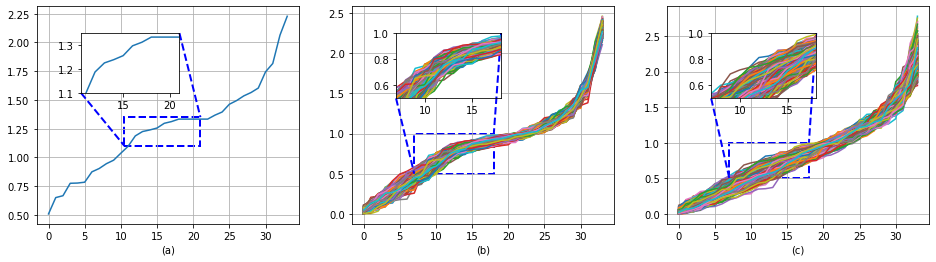

In [25]:
x = range(A.shape[0])

fig = plt.figure(figsize=(16,4))

ax1=plt.subplot(1,3,1)

plt.plot(x, np.sort(a));
plt.grid(True)
plt.xlabel('(a)')

axins1 = inset_axes(ax1, width="75%", height="55%",loc='upper left',
                   bbox_to_anchor=(0.15, 0.4, 0.5, 0.5),
                   bbox_transform=ax1.transAxes)

axins1.plot(x, np.sort(a));
axins1.set_xlim(10.5, 21)
axins1.set_ylim(1.1, 1.35)

mark_inset(ax1, axins1, loc1=1, loc2=3, fc="none", ec='b', lw=2, ls='--',)

# =======================================================
ax2=plt.subplot(1,3,2)
for i in s_u:
    plt.plot(x, np.sort(i));
        
plt.grid(True)
plt.xlabel('(b)')

axins2 = inset_axes(ax2, width="80%", height="60%",loc='upper left',
                   bbox_to_anchor=(0.15, 0.4, 0.5, 0.5),
                   bbox_transform=ax2.transAxes)
for i in s_u:
    axins2.plot(x, np.sort(i));    

    
    
axins2.set_xlim(7, 18)
axins2.set_ylim(0.5, 1.0)


mark_inset(ax2, axins2, loc1=1, loc2=3, fc="none", ec='b', lw=2, ls='--',)

# =======================================================
ax3=plt.subplot(1,3,3)
for i in s_n:
    plt.plot(x, np.sort(i));

plt.grid(True)
plt.xlabel('(c)')

axins3 = inset_axes(ax3, width="80%", height="60%",loc='upper left',
                   bbox_to_anchor=(0.15, 0.4, 0.5, 0.5),
                   bbox_transform=ax3.transAxes)

for i in s_n:
    axins3.plot(x, np.sort(i));

axins3.set_xlim(7, 18)
axins3.set_ylim(0.5, 1.0)

mark_inset(ax3, axins3, loc1=1, loc2=3, fc="none", ec='b', lw=2, ls='--',)
    
plt.show()